##  MACHINE LEARNING - PREVENDO DIABETES  ##

In [2]:
#Modelo Preditivo que pode prever se a pessoa pode ou não desenvolver Diabetes Mellitus;
#Coleta do Banco de Dados: https://archive.ics.uci.edu/ml/datasets/diabetes

In [3]:
#DESCRIÇÃO DOS DADOS: Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas (independentes) e uma variável alvo (dependente), Resultado. As variáveis ​​independentes incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

In [4]:
#VARIÁVEIS:
#33 = Dose regular de insulina
#34 = dose de insulina NPH
#35 = Dose de insulina UltraLente
#48 = Medição de glicose no sangue não especificada
#57 = Medição de glicose no sangue não especificada
#58 = Medição de glicose no sangue antes do café da manhã
#59 = Medição de glicose no sangue pós-café da manhã
#60 = Medição de glicose no sangue antes do almoço
#61 = Medição de glicose no sangue pós-almoço
#62 = Medição de glicose no sangue antes da ceia
#63 = Medição de glicose no sangue pós-ceia
#64 = Medição de glicose no sangue antes do lanche
#65 = Sintomas hipoglicêmicos
#66 = Ingestão de refeição típica
#67 = Ingestão de refeição mais do que o normal
#68 = Ingestão de refeição menos do que o normal
#69 = Atividade típica de exercícios
#70 = Atividade de exercício mais do que o normal
#71 = Atividade de exercício menos do que o normal
#72 = Evento especial não especificado

#OBSERVAÇÕES
#Nomes e formato dos arquivos:
#(1) Data no formato MM-DD-AAAA
#(2) Hora no formato XX: YY
#(3) Código
#(4) Valor



In [5]:
from IPython.display import Image
Image(url = 'DM.png')

In [6]:
#IGNORANDO WARNINGS
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.22.1'

In [7]:
# Carregando "dataset" arquivo csv usando Pandas.
import pandas as pd
arquivo = 'dataset.csv'


In [8]:
#Inserindo nome nas colunas, pois o cabeçalho encontra-se sem nome das variáveis
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']


In [9]:
dados = pd.read_csv(arquivo, names = colunas)


In [10]:
#Analisando o shape dos dados
print(dados.shape)

#Observação: 768 linhas e 09 colunas

(768, 9)


##  ANÁLISE ESTATÍSTICA DOS DADOS- DESCRITIVA  ##

In [11]:
# Visualizando as primeiras 5 linhas

dados.head(5)

,Preg,Plas,Pres,Pele,Teste,Massa,Pedi,Idade,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Tipo de dados de cada atributo
dados.dtypes

Preg        int64
Plas        int64
Pres        int64
Pele        int64
Teste       int64
Massa     float64
Pedi      float64
Idade       int64
Target      int64
dtype: object

In [13]:
# Sumário (RESUMO) estatístico
#CONTAGEM, MEDIA, DESVIO PADRA, MINIMO, QUARTIS E O VALOR MAXIMO
dados.describe()

,Preg,Plas,Pres,Pele,Teste,Massa,Pedi,Idade,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Visualizando a distribuição da variável TARGET
dados.groupby('Target').size()

Target
0    500
1    268
dtype: int64

In [15]:
#Precisará balancear classes, uma vez que a variável Target tem mais casos de não diagnosticados com DM que com DM. 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes).

In [16]:
# Opto pela correlação de Spearman (não lineares), a Pearson (lineares), uma vez que não verifiquei a distribuição de todas variáveis.
dados.corr(method = 'spearman')
#diagnonal igual a 1, pois a correlação da variavel com ela mesma

,Preg,Plas,Pres,Pele,Teste,Massa,Pedi,Idade,Target
Preg,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Plas,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
Pres,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
Pele,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Teste,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
Massa,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
Pedi,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Idade,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Target,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


In [17]:
# Medida da assimetria da distribuição de probabilidade de uma variável aleatória de valor real sobre sua média. O valor da aspereza pode ser positivo ou negativo, ou mesmo indefinido. 
#Valores --> Skewness:Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada. Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada. Se v=0, então a distribuição é aproximadamente simétrica.
dados.skew()

Preg      0.901674
Plas      0.173754
Pres     -1.843608
Pele      0.109372
Teste     2.272251
Massa    -0.428982
Pedi      1.919911
Idade     1.129597
Target    0.635017
dtype: float64

In [18]:
#Kurtose dos dados - caracteriza o achatamento da curva da função de distribuição de probabilidade.
#Se o valor da curtose for = 0 (ou 3, pela segunda definição), então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas
#Se o valor é > 0 (ou > 3), então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
#Se o valor é < 0 (ou < 3), então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica
dados.kurt()

Preg      0.159220
Plas      0.640780
Pres      5.180157
Pele     -0.520072
Teste     7.214260
Massa     3.290443
Pedi      5.594954
Idade     0.643159
Target   -1.600930
dtype: float64

In [19]:
#Instalando MatPlotlib para o gráfico ficar na mesma janela do jupyter
import matplotlib.pyplot as plt
#Caso deseje visualizar em tela a parte, desativar essa célula.
%matplotlib inline

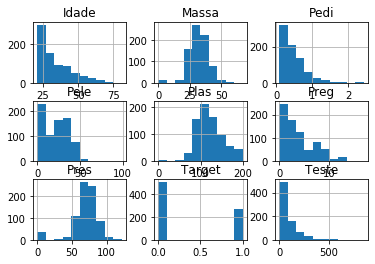

In [20]:
# Um histograma é uma ferramenta de análise e representação de dados quantitativos, agrupados em classes de frequência que permite distinguir a forma, o ponto central e a variação da distribuição, além de outros dados como amplitude e simetria na distribuição dos dados.
#Analisa a distribuição de apenas uma variável.
#Apenas Mas e Pres tendendem a distribuição normal.
dados.hist()
plt.show()

In [21]:
#Avaliando Mediana, Média e Moda da Variável "Massa""
dados["Massa"].mean()

31.992578124999977

In [22]:
dados["Massa"].median()

32.0

In [23]:
#Vetificando valor máximo, mínimo e Desvio Padrão da variável
dados["Massa"].max()

67.1

In [24]:
dados["Massa"].min()

0.0

In [25]:
dados["Massa"].std()

7.8841603203754405

In [26]:
#Calculando a Moda (instalando pacote estatístico)
from statistics import mode
mode(dados["Massa"])

32.0

In [27]:
dados["Pres"].mean()

69.10546875

In [28]:
dados["Pres"].median()

72.0

In [29]:
mode(dados["Pres"])

70

In [30]:
dados["Pres"].max()

122

In [31]:
dados["Pres"].min()

0

In [32]:
dados["Pele"].std()

15.952217567727677

In [33]:
##MÉDIA E MEDIANA PRÓXIMAS, MAIS INDÍCIOS DE DISTRIBUIÇÃO NORMAL DAS VARIÁVEIS "PRES"& "MAS"##

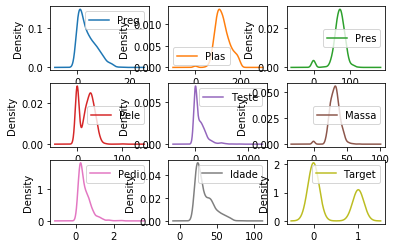

In [34]:
# Distribuição das variáveis com outra formatação gráfica, mas com as mesmas informações do Histograma
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()


##Distribuição das variáveis: Idade & Pele tendendo a normalidade.
#Máximo, Mínimo distantes com o range de valores alargado.



In [35]:
dados["Idade"].mean()


33.240885416666664

In [36]:
dados["Idade"].median()

29.0

In [37]:
mode(dados["Idade"])

22

In [38]:
dados["Idade"].max()

81

In [39]:
dados["Pele"].min()

0

In [40]:
dados["Pele"].std()

15.952217567727677

In [41]:
dados["Pele"].mean()


20.536458333333332

In [42]:
dados["Pele"].median()


23.0

In [43]:
mode(dados["Pele"])

0

In [44]:
dados["Pele"].max()

99

In [45]:
dados["Pele"].std()

15.952217567727677

In [46]:
#Verificando dados faltantes
missing = dados.isnull().sum
print(missing)

<bound method DataFrame.sum of       Preg   Plas   Pres   Pele  Teste  Massa   Pedi  Idade  Target
0    False  False  False  False  False  False  False  False   False
1    False  False  False  False  False  False  False  False   False
2    False  False  False  False  False  False  False  False   False
3    False  False  False  False  False  False  False  False   False
4    False  False  False  False  False  False  False  False   False
..     ...    ...    ...    ...    ...    ...    ...    ...     ...
763  False  False  False  False  False  False  False  False   False
764  False  False  False  False  False  False  False  False   False
765  False  False  False  False  False  False  False  False   False
766  False  False  False  False  False  False  False  False   False
767  False  False  False  False  False  False  False  False   False

[768 rows x 9 columns]>


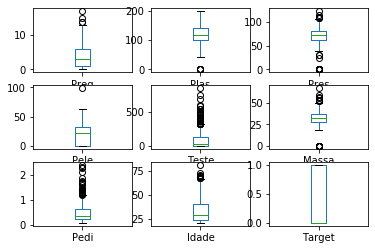

In [47]:
# Box and Whisker Plots
#Boxplot --> identifica outliers
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

In [48]:
## VARIÁVEIS PLAS, PELE E A TARGET COM POUCOS OU SEM OUTLIERS

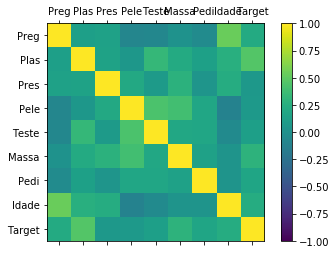

In [49]:
#Matriz de Correlação das Variáveis
correlations = dados.corr()

# Plot
#Importando Numpy
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)

#Tamanho do quadrado (array)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()
#Cor escura baixa correlacao

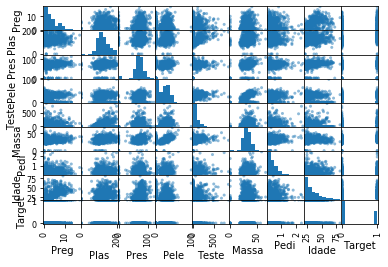

In [50]:
# Scatter Plot 
#Os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

In [51]:
#Importando pacote Seaborn
import seaborn as sns

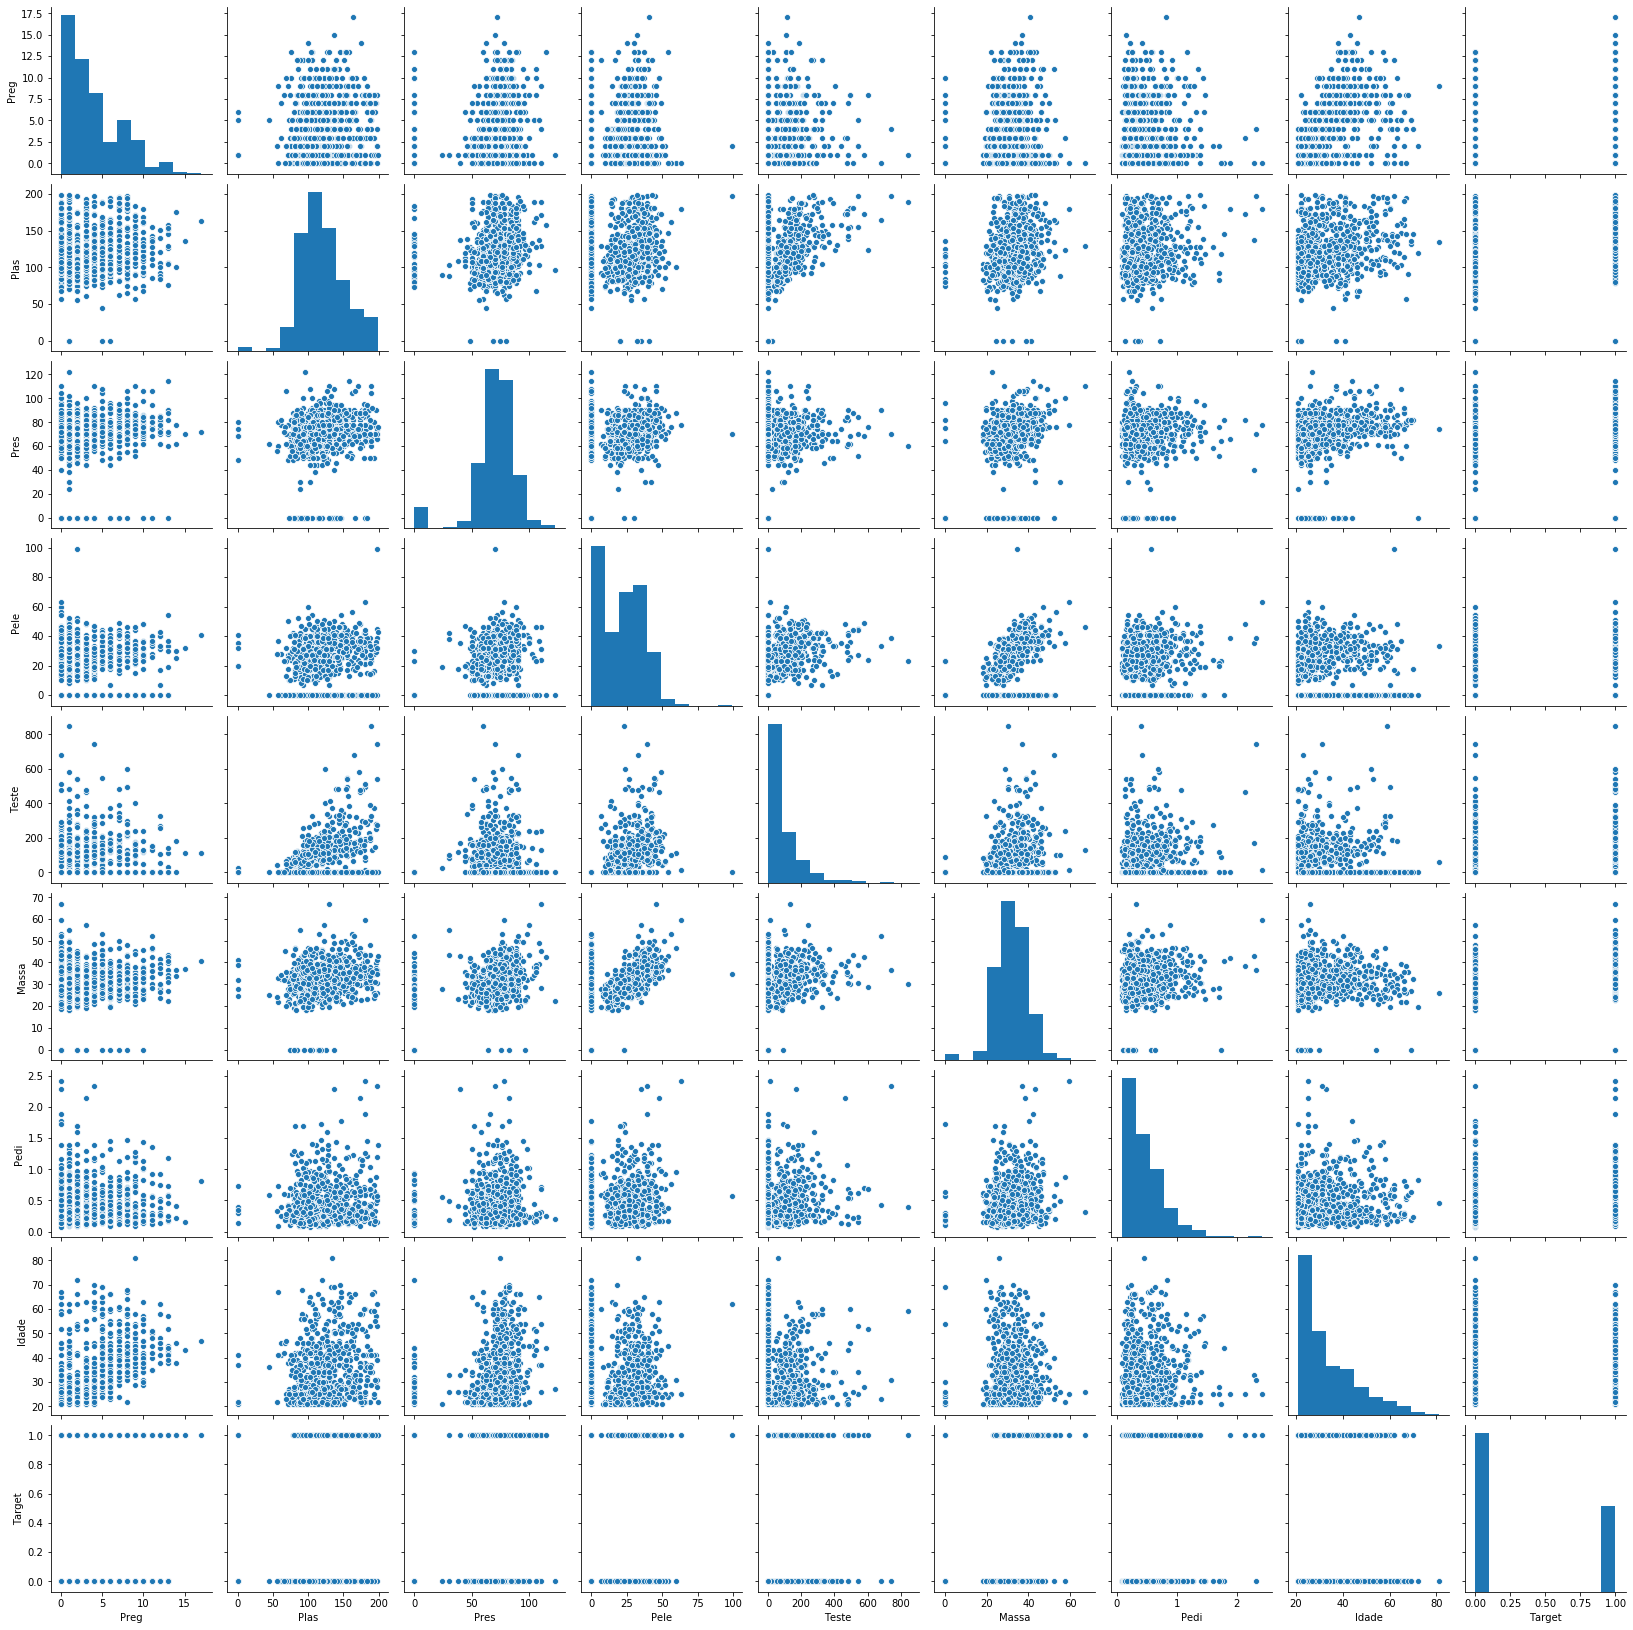

In [52]:
# Representação gráfica como acima, porém mais agradável visualmente -Pairplot
#unindo graficos em uma area de visualizacao
sns.pairplot(dados)

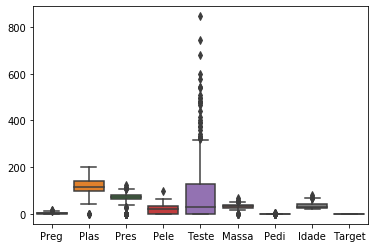

In [53]:
# Boxplot com orientação vertical de todas variáveis
sns.boxplot(data = dados, orient = "v")
#Teste tem maior número de Outliers

In [54]:
#Resumo estatistico do dataset DM
#Registros;
#Mean;
#Desvio Padrão;
#Valor Mínimo;
#Primeiro Quartil;
#Segundo Quartil ==> Mediana;
#Terceiro Quartil;
#Valor Máximo

dados.describe()

,Preg,Plas,Pres,Pele,Teste,Massa,Pedi,Idade,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
##DISTRIBUIÇÃO DE TODAS VARIÁVEIS EM HISTOGRAMAS DISTINTOS##

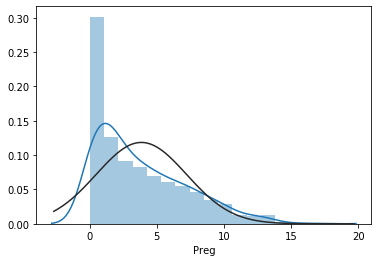

In [56]:
#Pacote estatístico
from scipy import stats
sns.distplot(dados.Preg, fit = stats.norm);

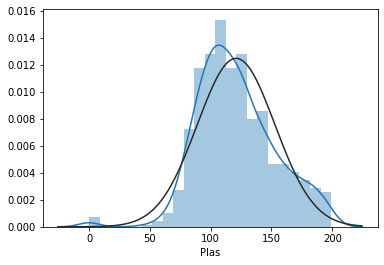

In [57]:
sns.distplot(dados.Plas, fit = stats.norm);

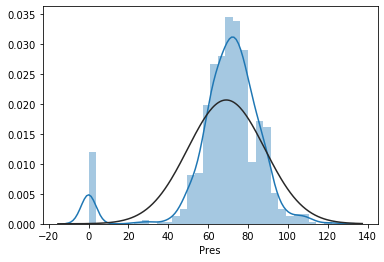

In [58]:
sns.distplot(dados.Pres, fit = stats.norm);

## Preparando os Dados para Machine Learning

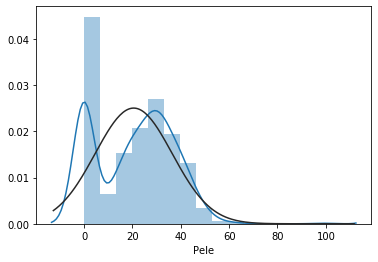

In [59]:
sns.distplot(dados.Pele, fit = stats.norm);

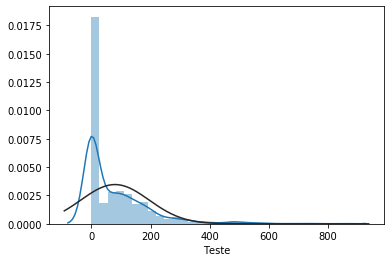

In [60]:
sns.distplot(dados.Teste, fit = stats.norm);

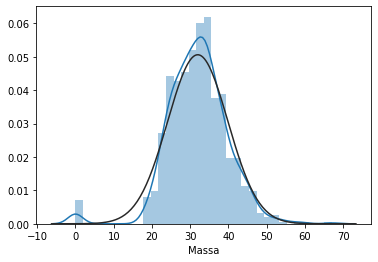

In [61]:
sns.distplot(dados.Massa, fit = stats.norm);

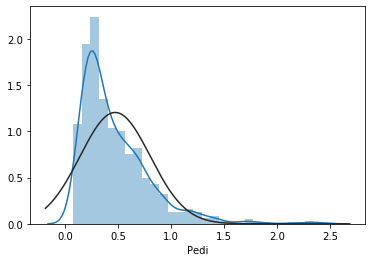

In [62]:
sns.distplot(dados.Pedi, fit = stats.norm);

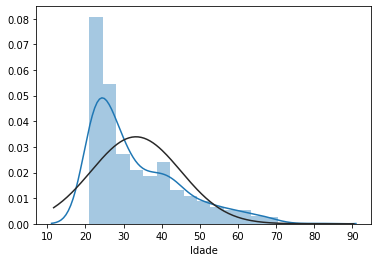

In [63]:
sns.distplot(dados.Idade, fit = stats.norm);

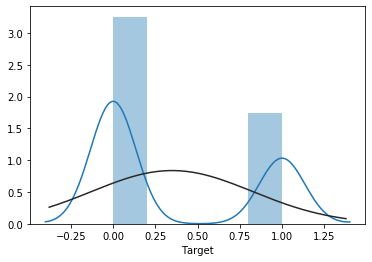

In [64]:
sns.distplot(dados.Target, fit = stats.norm);

## Normalização ##


In [65]:
#A normalização é uma técnica geralmente aplicada como parte da 
#preparação de dados para o aprendizado de máquina. O objetivo da 
#normalização é mudar os valores das colunas numéricas no conjunto de 
#dados para usar uma escala comum, sem distorcer as diferenças nos 
#intervalos de valores nem perder informações. A normalização também é 
#necessária para alguns algoritmos para modelar os dados corretamente.

#PADRONIZACAO NAO ALTERA A DISTRIBUICAO DOS DADOS,
#APENAS COLOCA MEDIA = 0 E DP = 1
#BINARIZACAO COLOCA VALORES COM  0 OU 1 

# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
arquivo = 'dataset.csv'

#9 Colunas, sendo a última a variável Target. 8 primeiras Preditoras
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']

#Variavel TARGET class
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input (X) e output (Y)
# 0 A 7,POIS É EXCLUSIVO
#Variável preditora
X = array[:,0:8]
#Variável Target
Y = array[:,8]

#Escala de 0 a 1
# Gerando a nova escala (normalizando os dados) --> (feature_range = (0, 1))
scaler = MinMaxScaler(feature_range = (0, 1))
#Y É A VARIAVEL DE SAIDA NESSE PROBLEMA DE NEGOCIO NAO PRECISA PADRONIZAR

#Aplica o objeto a variável x --> variáveis preditoras e não a Target
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


## Padronização

In [66]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)
#Favorece uma distribuição normal.
#Diferentes médias e diferentes desvios padrões as variáveis 
#e a Padronização favorece esses se igualarem as medidas.

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Padronizados: 

 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


## Binarização

In [67]:
# Binarização

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando a binarização
binarizer = Binarizer(threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Binarizados: \n\n", binaryX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Binarizados: 

 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Eliminação Recursiva de Atributos

In [68]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", dados.columns[0:8])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

#Preg, Mas e Pedi --> Variáveis que mais influenciaram o modelo.

Variáveis Preditoras: Index(['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade'], dtype='object')
Variáveis Selecionadas: [ True False False False False  True  True False]
Ranking dos Atributos: [1 2 4 5 6 1 1 3]
Número de Melhores Atributos: 3


## Método Ensemble para Seleção de Variáveis

In [69]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados.columns[0:8])
print(modelo.feature_importances_)

#Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
#[0.10963424 0.2360922  0.10006751 0.07675019 0.07243519 0.14376287
# 0.12246646 0.13879134]
#Quando maior o escore, melhor influencia ao modelo.


Index(['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade'], dtype='object')
[0.10778481 0.23425656 0.09977492 0.08070932 0.07508152 0.13685259
 0.11951779 0.14602249]


### Amostragem - Dados de Treino e de Teste

In [70]:
# Avaliação usando dados de treino e de teste
#70/30 Treino e Teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho das amostras 
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
#Reproduzir mesmos resultados
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

#De cada 100% acerta 78%. 

Acurácia nos Dados de Teste: 78.740%


### Cross Validation

In [71]:
# Avaliação usando Cross Validation
#EM geral aumenta a performace do modelo!!!

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 77.604%


## Avaliando a Performance

### Métricas para Algoritmos de Classificação

In [72]:
# #Acurácia
# #Número de previsões corretas. É útil apenas quando existe o mesmo número de observações em cada classe.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.604


In [73]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positiavs e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (TP). Ese é o número de instâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Mass', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = LogisticRegression()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100))

AUC: 82.349


In [74]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)
#141 e 41 acertos do modelo

[[142  20]
 [ 34  58]]


In [75]:
# Relatório de Classificação

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando os dados
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Mass', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

Acurácia: 77.604
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



# Algoritmos de Classificação

## Regressão Logística

## Linear Discriminant Analysis

In [76]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.604
Acurácia: 77.604


In [77]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Mass', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.697


## KNN - K-Nearest Neighbors

In [78]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.697


## Naive Bayes

In [79]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.914


## CART (Classification and Regression Trees)

In [80]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 68.635


## SVM - Support Vector Machines

In [81]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = SVC()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.046


# Seleção do Modelo Preditivo

LR: 0.778537 (0.039246)
LDA: 0.768199 (0.052114)
NB: 0.760424 (0.032883)
KNN: 0.712286 (0.056001)
CART: 0.717550 (0.034653)
SVM: 0.763090 (0.049592)


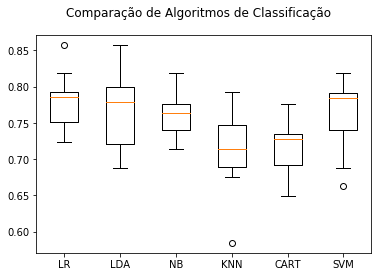

In [82]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
#Lista vazia e criando append os modelos de ML
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle=True)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Otimização do Modelo - Ajuste de Hyperparâmetros

### Grid Search Parameter Tuning

In [83]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 77.610
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Salvando o resultado do seu trabalho

In [84]:
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 78.740


# Otimizando Performance com Métodos Ensemble

### Bagged Decision Trees

In [85]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Cria o modelo unitário (classificador fraco)
cart = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.913


### Random Forest

In [86]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.042


### AdaBoost

In [87]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.786


### Gradient Boosting

In [88]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.049


### Voting Ensemble

In [89]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Carregando os dados
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando os modelos
estimators = []

modelo1 = LogisticRegression()
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))

modelo3 = SVC()
estimators.append(('svm', modelo3))

# Criando o modelo ensemble
ensemble = VotingClassifier(estimators)

# Cross Validation
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

# Resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.049
Acurácia: 76.827


## Algoritmo XGBoost - Extreme Gradient Boosting

### Instalar XGBoost a partir do PyPi
!pip install xgboost

In [90]:
!pip install xgboost


  Using cached xgboost-1.5.1.tar.gz (730 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/macbook/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-wheel-b2donwcz
       cwd: /private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/
  Complete output (803 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.7
  creating build/lib.macosx-10.9-x86_64-3.7/xgboost
  copying xgboost/rabit.py -> b

Failed to build xgboost
    Running setup.py install for xgboost ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/macbook/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-record-uum11_7t/install-record.txt --single-version-externally-managed --compile --install-headers /Users/macbook/anaconda3/include/python3.7m/xgboost
         cwd: /private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/
    Complete output (803 lines):
    running install
    r

ERROR: Command errored out with exit status 1: /Users/macbook/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-install-hwqz58gn/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/96/46xlm75524b7v46lhmzt6c1c0000gn/T/pip-record-uum11_7t/install-record.txt --single-version-externally-managed --compile --install-headers /Users/macbook/anaconda3/include/python3.7m/xgboost Check the logs for full command output.


In [91]:
!conda install -c conda-forge xgboost

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2020.02=py37_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

# All requested packages already installed.



In [92]:

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregando os dados
arquivo = 'dataset.csv'
colunas = ['Preg', 'Plas', 'Pres', 'Pele', 'Teste', 'Massa', 'Pedi', 'Idade', 'Target']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 76.049
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Acurácia: 77.95%
